In [3]:
from google.colab import drive
drive.mount("/gdrive/")

Mounted at /gdrive/


In [4]:
# 라이브러리 설정
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 데이콘 사이트에서 다운로드한 CSV 파일 읽어오기
file_path = "/gdrive/My Drive/Colab Notebooks/ML-Study/ML-Study/ML-basic/"
train = pd.read_csv(file_path + "titanic/train.csv")
test = pd.read_csv(file_path + "titanic/test.csv")
submission = pd.read_csv(file_path + "titanic/submission.csv")
print(train.shape, test.shape, submission.shape)

(891, 12) (418, 11) (418, 2)


In [6]:
# train 데이터프레임 내용 확인
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [7]:
# 테스트 데이터프레임 내용 확인
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [8]:
# submission 제출 파일 양식 확인
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [9]:
# train 데이터프레임 개요 정보
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# train 데이터프레임 통계 정보
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


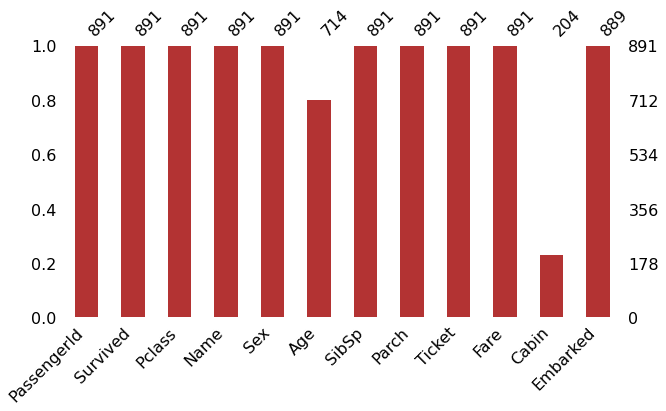

In [11]:
# 결측값 분포
import missingno as msno
msno.bar(train, figsize=(10,5), color=(0.7,0.2,0.2))
plt.show()

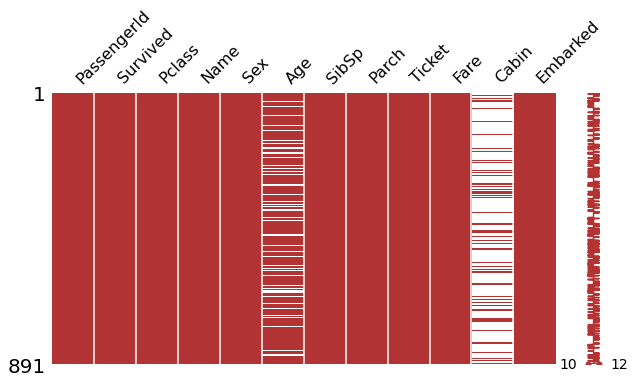

In [14]:
msno.matrix(train, figsize=(10,5), color=(0.7,0.2,0.2))
plt.show()

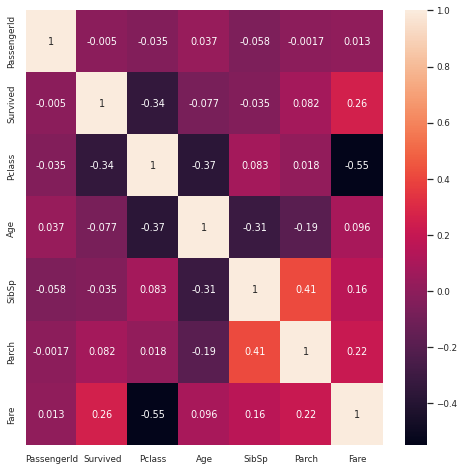

In [15]:
# 숫자형 변수 간의 상관 관계를 계산하여 히트맵 그리기
plt.figure(figsize=(8,8))
sns.set(font_scale=0.8)
sns.heatmap(train.corr(), annot=True, cbar=True)
plt.show()

In [16]:
# 숫자형 데이터만을 우선 사용하여 베이스라인 모델 만들기
# 타이타닉 전체 데이터셋 준비
train['TrainSplit'] = 'Train'
test['TrainSplit'] = 'Test'
data = pd.concat([train, test], axis=0)
print(data.shape)

(1309, 13)


In [17]:
# 데이터 전처리
# 숫자형 피처 추출
data_num = data.loc[:, ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

# 결측값 대체
data_num['Age'] = data_num['Age'].fillna(data_num['Age'].mean()) # 평균
data_num['Fare'] = data_num['Fare'].fillna(data_num['Fare'].mode()[0]) # 최빈값

# 학습용 데이터와 예측 대상인 테스트 데이터 구분
selected_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
X_train = data_num.loc[data['TrainSplit']=='Train', selected_features]
y_train = data_num.loc[data['TrainSplit']=='Train', 'Survived']

X_test = data_num.loc[data['TrainSplit']=='Test', selected_features]

print("Train 데이터셋 크기:", X_train.shape, y_train.shape)
print("Test 데이터셋 크기:", X_test.shape)

Train 데이터셋 크기: (891, 5) (891,)
Test 데이터셋 크기: (418, 5)


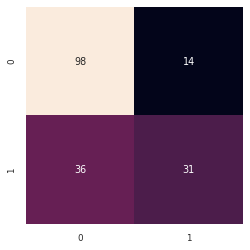

In [18]:
# 훈련 - 검증 데이터 분할
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=20)

# 로지스틱 회귀 모델 (이름만 회귀, 사실은 분류 알고리즘!)
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_tr, y_tr)
y_val_pred = lr_model.predict(X_val)

# Confusioin Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, cbar=False, square=True)
plt.show()

In [19]:
# 평가 지표
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
print("Accuracy:%.4f" % accuracy_score(y_val, y_val_pred))
print("Precision:%.4f"% precision_score(y_val, y_val_pred))
print("Recall:%.4f" % recall_score(y_val, y_val_pred))
print("F1:%.4f" % f1_score(y_val, y_val_pred))
print("AUC:%.4f" % roc_auc_score(y_val, y_val_pred))

Accuracy:0.7207
Precision:0.6889
Recall:0.4627
F1:0.5536
AUC:0.6688


In [20]:
# test 데이터에 대한 예측값 정리
y_test_pred = lr_model.predict(X_test)

# 제출 양식에 맞게 정리
submission['Survived'] = y_test_pred.astype(int)
# 제출 파일 저장
submission_filepath = file_path + "titanic/baseline_num_lr_submission_001.csv"
submission.to_csv(submission_filepath, index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [21]:
# 타깃 레이블 분포 확인
train['Survived'].value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

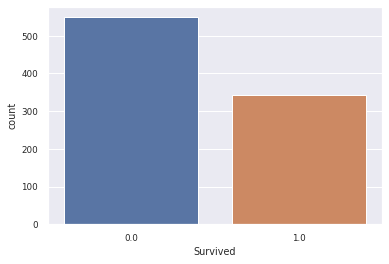

In [22]:
# 객실 등급별 분포 확인
sns.countplot(x='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()

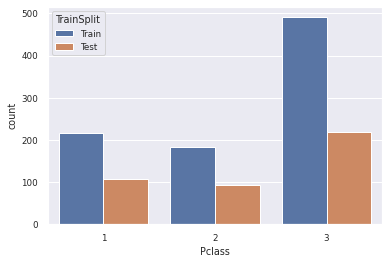

In [23]:
# train - test 데이터 분포
sns.countplot(x='Pclass', data=data, hue='TrainSplit')
plt.show()

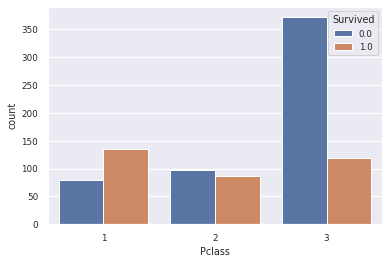

In [24]:
# Pclass별 Survived 여부
sns.countplot(x='Pclass', hue='Survived', data=data)

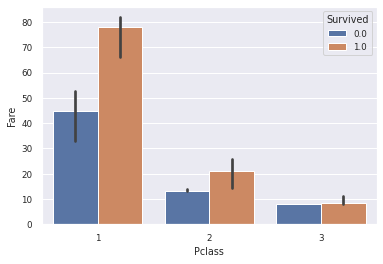

In [27]:
# Pclass별 Fare 객실 요금의 중간값 비교
sns.barplot(x='Pclass', y='Fare', hue='Survived', data=data[data['TrainSplit']=='Train'], estimator=np.median)
plt.show()

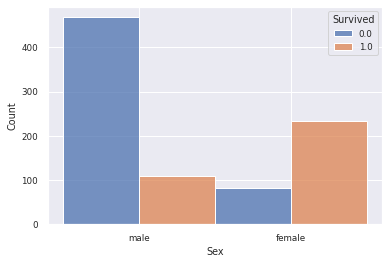

In [28]:
# hisplot 함수 - dodge 옵션
sns.histplot(x='Sex', hue='Survived', multiple='dodge', data=data[data['TrainSplit']=='Train'])
plt.show()

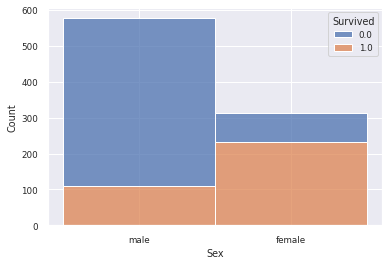

In [29]:
# histplot 함수 - stack 옵션
sns.histplot(x='Sex', hue='Survived', multiple='stack', data=data[data['TrainSplit']=='Train'])
plt.show()

In [30]:
# 레이블 인코딩 female:0, male:1
data.loc[data['Sex']=='female', 'Sex'] = 0
data.loc[data['Sex']=='male', 'Sex'] = 1
data['Sex'] = data['Sex'].astype(int)

# 성별 분포 확인
data['Sex'].value_counts(dropna=False)

1    843
0    466
Name: Sex, dtype: int64

In [31]:
data['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina', ..., 'Saether, Mr. Simon Sivertsen',
       'Ware, Mr. Frederick', 'Peter, Master. Michael J'], dtype=object)

In [36]:
title_name = data['Name'].str.split(", ", expand=True)[1]
title_name

0                                 Mr. Owen Harris
1      Mrs. John Bradley (Florence Briggs Thayer)
2                                     Miss. Laina
3              Mrs. Jacques Heath (Lily May Peel)
4                               Mr. William Henry
                          ...                    
413                                     Mr. Woolf
414                                 Dona. Fermina
415                           Mr. Simon Sivertsen
416                                 Mr. Frederick
417                             Master. Michael J
Name: 1, Length: 1309, dtype: object

In [38]:
title = title_name.str.split(".", expand=True)[0]
title.value_counts(dropna=False)

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: 0, dtype: int64

In [40]:
title = title.replace(['MS'], 'Miss')
title = title.replace(['Mlle', 'the Countess', 'Lady', 'Don', 'Dona', 'Mme', 'Sir', 'Jonkherr'], 'Noble')
title = title.replace(['Col', 'Major', 'Capt'], 'Officer')
title = title.replace(['Dr', 'Rev'], 'priest')
data['Title'] = np.array(title)
data['Title'].value_counts(dropna=False)

Mr          757
Miss        260
Mrs         197
Master       61
priest       16
Noble         8
Officer       7
Ms            2
Jonkheer      1
Name: Title, dtype: int64

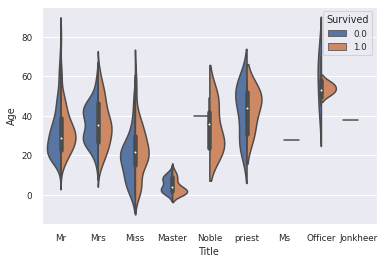

In [41]:
# 승객 나이와 생존 여부와의 관계
sns.violinplot(x='Title', y='Age', data=data, hue='Survived', split=True)
plt.show()

In [42]:
# Name 열 삭제
data = data.drop('Name', axis=1)
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'TrainSplit', 'Title'],
      dtype='object')

In [44]:
# 결측값 확인 및 대체
for title in data['Title'].unique():
  # 결측값 개수 확인
  print("%s 결측값 개수:" % title, data.loc[data['Title']==title, 'Age'].isnull().sum())
  # 각 title의 중간값으로 대체
  age_med = data.loc[data['Title']==title, 'Age'].median()
  data.loc[data['Title']==title, 'Age'] = data.loc[data['Title']==title, 'Age'].fillna(age_med)

# 결측값 처리 여부 확인
print("\n")
print("Age 열의 결측값 개수:", data['Age'].isnull().sum())

Mr 결측값 개수: 176
Mrs 결측값 개수: 27
Miss 결측값 개수: 50
Master 결측값 개수: 8
Noble 결측값 개수: 0
priest 결측값 개수: 1
Ms 결측값 개수: 1
Officer 결측값 개수: 0
Jonkheer 결측값 개수: 0


Age 열의 결측값 개수: 0


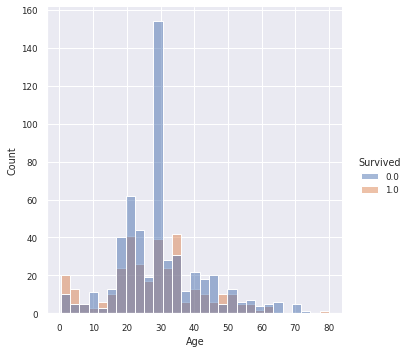

In [45]:
# Age 분포
sns.displot(x='Age', kind='hist', hue='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()

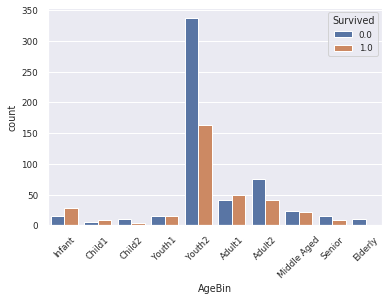

In [46]:
# 나이에 따라 생존율 차이가 나므로 히스토그램 분포를 기준으로 Age 열의 데이터를 여러 개의 구간으로 나눈다.
# Binning 기법이라고 한다.
bins = [0,4,8,12,16,32,36,48,56,64,100]
labels = ['Infant', 'Child1', 'Child2', 'Youth1', 'Youth2', 'Adult1', 'Adult2', 'Middle Aged',
          'Senior', 'Elderly']
data['AgeBin'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Age_bin에 따른 생존율 비교
sns.countplot(x='AgeBin', hue='Survived', data=data[data['TrainSplit']=='Train'])
plt.xticks(rotation=45)
plt.show()